## A simple ML TensorFlow demo using Keras
- linear prediction: y=w*x +b (y = 2x +4), 
- Tensorboard visualization
- Homework

### 4/16/2023

##### Creating the model architecture: x (input layer) --> w (weight) --> y (output layer)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
from time import time
import matplotlib.pyplot as plt

### Dataset

In [19]:
x = np.array([0, 4, 8, 6, 3, 2, 9, 5, 7, 1])
y = np.array([4, 12, 20, 16, 10, 8, 22, 14, 18, 6])

### Model

In [20]:
model = Sequential([
    Dense(units=1, input_shape=[1], activation='relu'),
])

In [21]:
model.compile(optimizer='sgd', loss='mean_squared_error')      

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Using Tensorboard to monitor progress

In [22]:
# tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(time()))
tensorboard = keras.callbacks.TensorBoard(log_dir="logs/{}".format(time()))

2023-04-16 17:05:12.032027: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.


### Train the model

In [23]:
result = model.fit(x, y, epochs=100, batch_size=64, verbose=1, callbacks=[tensorboard])
# result = model.fit(x, y, epochs=100, batch_size=64, verbose=1)
# result = model.fit(x, y, epochs=100, verbose=0)
# Display via Command windows
# tensorboard --logdir=./logs/ 
# localhost:6006


Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 82.9736
Epoch 2/100
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1/1 [==============================] - 0s 2ms/step - loss: 17.7087
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 6.3427
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 4.3421
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 3.9599
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 3.8577
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 3.8043
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7598
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7171
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 3.6752
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 3.6338
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - 

2023-04-16 17:05:22.393953: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2023-04-16 17:05:22.408955: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/1681679112.0318651/train/plugins/profile/2023_04_16_17_05_22
2023-04-16 17:05:22.409801: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to logs/1681679112.0318651/train/plugins/profile/2023_04_16_17_05_22/LiangMac.trace.json.gz
2023-04-16 17:05:22.411735: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: logs/1681679112.0318651/train/plugins/profile/2023_04_16_17_05_22
2023-04-16 17:05:22.412186: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for memory_profile.json.gz to logs/1681679112.0318651/train/plugins/profile/2023_04_16_17_05_22/LiangMac.memory_profile.json.gz
2023-04-16 17:05:22.415010: I tensorflow/python/profiler/internal/profiler_wrapper

1/1 [==============================] - 0s 2ms/step - loss: 2.5578
Epoch 43/100
1/1 [==============================] - 0s 2ms/step - loss: 2.5290
Epoch 44/100
1/1 [==============================] - 0s 2ms/step - loss: 2.5005
Epoch 45/100
1/1 [==============================] - 0s 2ms/step - loss: 2.4724
Epoch 46/100
1/1 [==============================] - 0s 2ms/step - loss: 2.4445
Epoch 47/100
1/1 [==============================] - 0s 3ms/step - loss: 2.4170
Epoch 48/100
1/1 [==============================] - 0s 1ms/step - loss: 2.3898
Epoch 49/100
1/1 [==============================] - 0s 1ms/step - loss: 2.3628
Epoch 50/100
1/1 [==============================] - 0s 3ms/step - loss: 2.3362
Epoch 51/100
1/1 [==============================] - 0s 3ms/step - loss: 2.3099
Epoch 52/100
1/1 [==============================] - 0s 3ms/step - loss: 2.2839
Epoch 53/100
1/1 [==============================] - 0s 2ms/step - loss: 2.2582
Epoch 54/100
1/1 [==============================] - 0s 2ms/step -

In [24]:
# Or display inline
%reload_ext tensorboard
%tensorboard --logdir logs

In [12]:
print(result.history.keys())

dict_keys(['loss'])


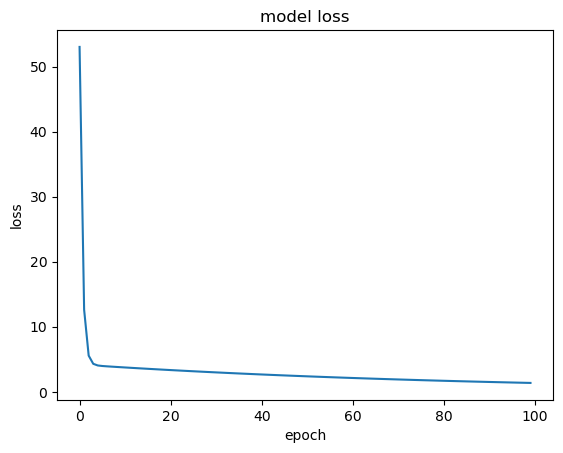

In [16]:
plt.plot(result.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Test model: Model prediction - predict the unseen data
### The model never sees input 12 in the training phase, and the model also never told that the formula to calculate the output is y = 2x + 4. However, the machine learning model successfully predicts the output from the given input.

In [17]:
prediction = model.predict([12])

In [18]:
print(prediction)

[[29.97293]]


### Homework:

- Train the model with a different dataset
- The model converged really fast, which means it learned the relationship between x and y values after just a couple of iterations. Do you think it makes sense to continue training the model after the loss doesn’t keep decreasing any further? How would you automate the process of stopping the training after the model loss doesn’t substantially change?
- Add more examples in the input and output tensors. In addition, try to change the dimensions of the data, say by adding an extra value in each array. What needs to be changed to successfully train the network with the new data? 
- Build a more complex model. In our example, we used a single hidden layer. Try to take a look at the tensorflow documentation to figure out what you need to do to get a model with more layers. What happens if you add more hidden layers?
- We did not discuss the learning rate (lr=0.01) and the optimizer choice in great detail. Check out the tf documentation to learn more about what other optimizers you can use. How do you think this affects training?